This first part is only needed as we have to mock VASP here as we cannot run it directly in a jupyter notebook:

In [1]:
from mock_vasp import TEST_DIR, mock_vasp

ref_paths = {
        "tight relax 1": "Si_gruneisen_1/tight_relax_1",
        "tight relax 2": "Si_gruneisen_1/tight_relax_2",
        "tight relax 1 plus": "Si_gruneisen_1/tight_relax_plus",
        "tight relax 2 plus": "Si_gruneisen_1/tight_relax_plus_2",
        "tight relax 1 minus": "Si_gruneisen_1/tight_relax_minus",
        "tight relax 2 minus": "Si_gruneisen_1/tight_relax_minus_2",
        "phonon static 1/1 ground": "Si_gruneisen_1/phonon_ground",
        "phonon static 1/1 plus": "Si_gruneisen_1/phonon_plus",
        "phonon static 1/1 minus": "Si_gruneisen_1/phonon_minus",
    }

/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Grüneisen Workflow Tutorial with VASP

## Background
The Grüneisen workflow is based on the implementation in Phonopy.

If you want to read more about Phonopy, please read Togo’s paper: https://doi.org/10.7566/JPSJ.92.012001

## Let's run the workflow
Now, we load a structure and other important functions and classes for running the Grüneisen workflow.

In [2]:
from jobflow import JobStore, run_locally
from maggma.stores import MemoryStore
from pymatgen.core import Structure

from atomate2.vasp.flows.gruneisen import GruneisenMaker, PhononMaker

job_store = JobStore(MemoryStore(), additional_stores={"data": MemoryStore()})
si_structure = Structure.from_file(TEST_DIR / "structures" / "Si_diamond.cif")

Then one can use the `GruneisenMaker` to generate a `Flow`.

In [3]:
flow = GruneisenMaker(
        symprec=1e-4,
        phonon_maker=PhononMaker(
            create_thermal_displacements=False,
            store_force_constants=False,
            prefer_90_degrees=False,
            min_length=10,
            born_maker=None,
            bulk_relax_maker=None,
            static_energy_maker=None,
        ),
    ).make(structure=si_structure)


<string>:14: UserWarning: You are using different symmetry precisions in the phonon makers and other parts of the Grüneisen workflow.


The Grüneisen parameter workflow will perform 3 different phonon runs at 3 different volumes at and around the equilibrium to compute the mode Grüneisen values.

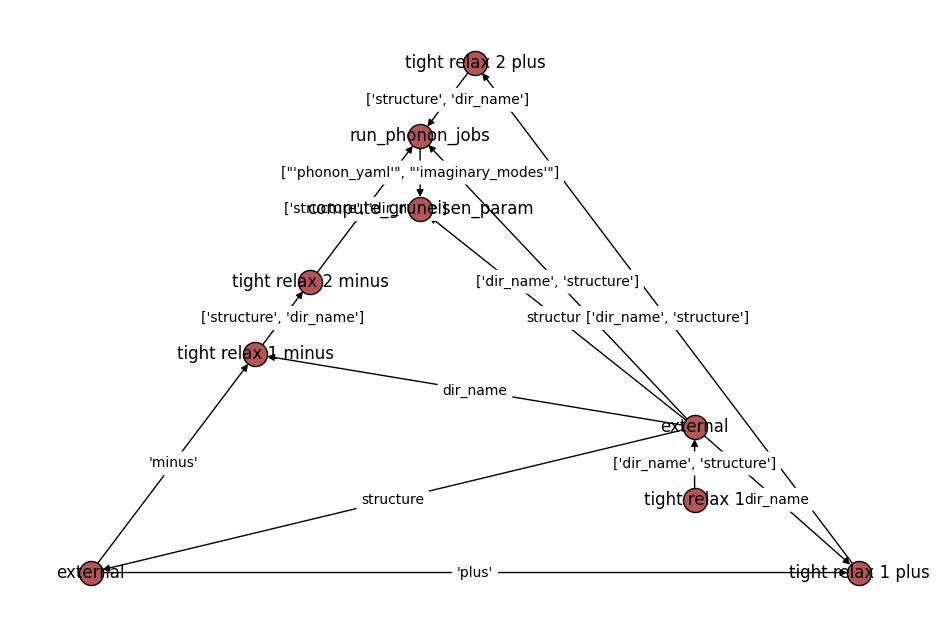

In [4]:
flow.draw_graph().show()

We now run the flow with  `run_locally`. We mock the run here. Normally, you would simply use `run_locally` without the `with mock_vasp`

In [5]:
with mock_vasp(ref_paths=ref_paths) as mf:
    run_locally(
        flow,
        create_folders=True,
        ensure_success=True,
        raise_immediately=True,
        store=job_store,
    )

2025-02-14 14:54:30,030 INFO Started executing jobs locally
2025-02-14 14:54:30,037 INFO Starting job - tight relax 1 (635f3da5-ae43-4708-89d1-df7a122a4279)
2025-02-14 14:54:30,343 INFO Finished job - tight relax 1 (635f3da5-ae43-4708-89d1-df7a122a4279)
2025-02-14 14:54:30,344 WARNING Response.stored_data is not supported with local manager.
2025-02-14 14:54:30,345 INFO Starting job - tight relax 2 (c0ce18a9-cf40-48e0-8fd4-b509df9f81bd)


/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/pymatgen/io/vasp/outputs.py:1219: UserWarning: No POTCAR file with matching TITEL fields was found in

  warnings.warn("No POTCAR file with matching TITEL fields was found in\n" + "\n  ".join(potcar_paths))
/smb/jgeorge/hpc-user/PycharmProjects/2025_Update_atomate2_doc/atomate2/src/atomate2/common/files.py:268: UserWarning: /tmp/tmp9vbm1xrm/job_2025-02-14-13-54-30-344976-38705/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)


2025-02-14 14:54:30,977 INFO Finished job - tight relax 2 (c0ce18a9-cf40-48e0-8fd4-b509df9f81bd)
2025-02-14 14:54:30,978 WARNING Response.stored_data is not supported with local manager.
2025-02-14 14:54:30,978 INFO Starting job - shrink_expand_structure (5b972212-ce75-45e8-9ae1-8ae26567bcc3)
2025-02-14 14:54:30,997 INFO Finished job - shrink_expand_structure (5b972212-ce75-45e8-9ae1-8ae26567bcc3)
2025-02-14 14:54:30,997 INFO Starting job - tight relax 1 plus (07a9e9e2-34f4-4db5-8b81-a8682d69ae0c)


/smb/jgeorge/hpc-user/PycharmProjects/2025_Update_atomate2_doc/atomate2/src/atomate2/common/files.py:268: UserWarning: /tmp/tmp9vbm1xrm/job_2025-02-14-13-54-30-997414-38649/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)


2025-02-14 14:54:31,439 INFO Finished job - tight relax 1 plus (07a9e9e2-34f4-4db5-8b81-a8682d69ae0c)
2025-02-14 14:54:31,439 WARNING Response.stored_data is not supported with local manager.
2025-02-14 14:54:31,440 INFO Starting job - tight relax 1 minus (02947bae-ebc8-4050-af46-1693de1b3d3e)


/smb/jgeorge/hpc-user/PycharmProjects/2025_Update_atomate2_doc/atomate2/src/atomate2/common/files.py:268: UserWarning: /tmp/tmp9vbm1xrm/job_2025-02-14-13-54-31-440259-43132/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)


2025-02-14 14:54:31,878 INFO Finished job - tight relax 1 minus (02947bae-ebc8-4050-af46-1693de1b3d3e)
2025-02-14 14:54:31,879 WARNING Response.stored_data is not supported with local manager.
2025-02-14 14:54:31,880 INFO Starting job - tight relax 2 plus (ff4b871a-86d9-433c-97d2-33059eb34f66)


/smb/jgeorge/hpc-user/PycharmProjects/2025_Update_atomate2_doc/atomate2/src/atomate2/common/files.py:268: UserWarning: /tmp/tmp9vbm1xrm/job_2025-02-14-13-54-31-880034-84607/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)


2025-02-14 14:54:32,291 INFO Finished job - tight relax 2 plus (ff4b871a-86d9-433c-97d2-33059eb34f66)
2025-02-14 14:54:32,292 WARNING Response.stored_data is not supported with local manager.
2025-02-14 14:54:32,292 INFO Starting job - tight relax 2 minus (4ca671fb-d350-4433-baf6-6c38a13f1995)


/smb/jgeorge/hpc-user/PycharmProjects/2025_Update_atomate2_doc/atomate2/src/atomate2/common/files.py:268: UserWarning: /tmp/tmp9vbm1xrm/job_2025-02-14-13-54-32-292580-50166/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)


2025-02-14 14:54:32,827 INFO Finished job - tight relax 2 minus (4ca671fb-d350-4433-baf6-6c38a13f1995)
2025-02-14 14:54:32,827 WARNING Response.stored_data is not supported with local manager.
2025-02-14 14:54:32,828 INFO Starting job - run_phonon_jobs (faf17a4a-76d2-4bbf-9cb4-e0746d5ef3e5)
2025-02-14 14:54:32,987 INFO Finished job - run_phonon_jobs (faf17a4a-76d2-4bbf-9cb4-e0746d5ef3e5)
2025-02-14 14:54:33,011 INFO Starting job - get_supercell_size ground (dfe385c6-5a47-4221-b406-050f6e1aa08a)
2025-02-14 14:54:33,015 INFO Finished job - get_supercell_size ground (dfe385c6-5a47-4221-b406-050f6e1aa08a)
2025-02-14 14:54:33,016 INFO Starting job - generate_phonon_displacements ground (1eea40c3-a340-4412-9b31-51075764455a)


/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/jobflow/core/flow.py:431: UserWarning: Some jobs are not connected, their ordering may be random
  for node in itergraph(graph):
/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/jobflow/core/job.py:604: UserWarning: Initial magnetic moments will not be considered for the determination of the symmetry of the structure and thus will be removed now.
  response = function(*self.function_args, **self.function_kwargs)


2025-02-14 14:54:33,218 INFO Finished job - generate_phonon_displacements ground (1eea40c3-a340-4412-9b31-51075764455a)
2025-02-14 14:54:33,219 INFO Starting job - run_phonon_displacements ground (09a05460-f5a0-43d6-b4c2-e6d32dbbc8ea)
2025-02-14 14:54:33,350 INFO Finished job - run_phonon_displacements ground (09a05460-f5a0-43d6-b4c2-e6d32dbbc8ea)
2025-02-14 14:54:33,360 INFO Starting job - phonon static 1/1 ground (053a5674-3e05-4aee-a68e-67c1e6095858)


/smb/jgeorge/hpc-user/PycharmProjects/2025_Update_atomate2_doc/atomate2/src/atomate2/common/files.py:268: UserWarning: /tmp/tmp9vbm1xrm/job_2025-02-14-13-54-33-360435-77497/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)


2025-02-14 14:54:35,024 INFO Finished job - phonon static 1/1 ground (053a5674-3e05-4aee-a68e-67c1e6095858)
2025-02-14 14:54:35,025 WARNING Response.stored_data is not supported with local manager.
2025-02-14 14:54:35,026 INFO Starting job - store_inputs ground (09a05460-f5a0-43d6-b4c2-e6d32dbbc8ea, 2)
2025-02-14 14:54:35,027 INFO Finished job - store_inputs ground (09a05460-f5a0-43d6-b4c2-e6d32dbbc8ea, 2)
2025-02-14 14:54:35,028 INFO Starting job - generate_frequencies_eigenvectors ground (adde9cb7-328f-4b0d-b455-fe3fead5df18)


/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['number']) is deprecated.Use attribut

2025-02-14 14:54:41,975 INFO Finished job - generate_frequencies_eigenvectors ground (adde9cb7-328f-4b0d-b455-fe3fead5df18)
2025-02-14 14:54:41,976 INFO Starting job - get_supercell_size plus (3e352e55-8d05-4968-af9c-57b1b869b85b)
2025-02-14 14:54:41,979 INFO Finished job - get_supercell_size plus (3e352e55-8d05-4968-af9c-57b1b869b85b)
2025-02-14 14:54:41,980 INFO Starting job - generate_phonon_displacements plus (6b6e501b-15c6-4d3a-b953-ca06c2dfc8c6)


/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/jobflow/core/job.py:604: UserWarning: Initial magnetic moments will not be considered for the determination of the symmetry of the structure and thus will be removed now.
  response = function(*self.function_args, **self.function_kwargs)


2025-02-14 14:54:42,162 INFO Finished job - generate_phonon_displacements plus (6b6e501b-15c6-4d3a-b953-ca06c2dfc8c6)
2025-02-14 14:54:42,163 INFO Starting job - run_phonon_displacements plus (082a22ea-ef9f-4e32-9187-3c6cb90b2794)
2025-02-14 14:54:42,277 INFO Finished job - run_phonon_displacements plus (082a22ea-ef9f-4e32-9187-3c6cb90b2794)
2025-02-14 14:54:42,285 INFO Starting job - phonon static 1/1 plus (e8b282de-c12d-4373-ab83-f6b9a35e59d7)


/smb/jgeorge/hpc-user/PycharmProjects/2025_Update_atomate2_doc/atomate2/src/atomate2/common/files.py:268: UserWarning: /tmp/tmp9vbm1xrm/job_2025-02-14-13-54-42-284684-83186/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/pymatgen/io/vasp/outputs.py:1219: UserWarning: No POTCAR file with matching TITEL fields was found in

  warnings.warn("No POTCAR file with matching TITEL fields was found in\n" + "\n  ".join(potcar_paths))


2025-02-14 14:54:43,987 INFO Finished job - phonon static 1/1 plus (e8b282de-c12d-4373-ab83-f6b9a35e59d7)
2025-02-14 14:54:43,988 WARNING Response.stored_data is not supported with local manager.
2025-02-14 14:54:43,989 INFO Starting job - store_inputs plus (082a22ea-ef9f-4e32-9187-3c6cb90b2794, 2)
2025-02-14 14:54:43,991 INFO Finished job - store_inputs plus (082a22ea-ef9f-4e32-9187-3c6cb90b2794, 2)
2025-02-14 14:54:43,992 INFO Starting job - generate_frequencies_eigenvectors plus (c51572ce-1304-4014-855d-475ced9e9e54)


/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['number']) is deprecated.Use attribut

2025-02-14 14:54:50,351 INFO Finished job - generate_frequencies_eigenvectors plus (c51572ce-1304-4014-855d-475ced9e9e54)
2025-02-14 14:54:50,352 INFO Starting job - get_supercell_size minus (f1dc850a-c282-429c-9a9e-f8b54e9f17c6)
2025-02-14 14:54:50,355 INFO Finished job - get_supercell_size minus (f1dc850a-c282-429c-9a9e-f8b54e9f17c6)
2025-02-14 14:54:50,356 INFO Starting job - generate_phonon_displacements minus (c942e3f1-38cf-4f4e-ab4a-fe71cbc53017)


/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/jobflow/core/job.py:604: UserWarning: Initial magnetic moments will not be considered for the determination of the symmetry of the structure and thus will be removed now.
  response = function(*self.function_args, **self.function_kwargs)


2025-02-14 14:54:50,539 INFO Finished job - generate_phonon_displacements minus (c942e3f1-38cf-4f4e-ab4a-fe71cbc53017)
2025-02-14 14:54:50,540 INFO Starting job - run_phonon_displacements minus (0c49112c-7ce8-4a5b-ae24-7cdc6059568c)
2025-02-14 14:54:50,654 INFO Finished job - run_phonon_displacements minus (0c49112c-7ce8-4a5b-ae24-7cdc6059568c)
2025-02-14 14:54:50,662 INFO Starting job - phonon static 1/1 minus (2c3adcee-9d8f-4ccd-a97f-f9a09fa85130)


/smb/jgeorge/hpc-user/PycharmProjects/2025_Update_atomate2_doc/atomate2/src/atomate2/common/files.py:268: UserWarning: /tmp/tmp9vbm1xrm/job_2025-02-14-13-54-50-662182-29638/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/pymatgen/io/vasp/outputs.py:1219: UserWarning: No POTCAR file with matching TITEL fields was found in

  warnings.warn("No POTCAR file with matching TITEL fields was found in\n" + "\n  ".join(potcar_paths))


2025-02-14 14:54:52,357 INFO Finished job - phonon static 1/1 minus (2c3adcee-9d8f-4ccd-a97f-f9a09fa85130)
2025-02-14 14:54:52,358 WARNING Response.stored_data is not supported with local manager.
2025-02-14 14:54:52,358 INFO Starting job - store_inputs minus (0c49112c-7ce8-4a5b-ae24-7cdc6059568c, 2)
2025-02-14 14:54:52,361 INFO Finished job - store_inputs minus (0c49112c-7ce8-4a5b-ae24-7cdc6059568c, 2)
2025-02-14 14:54:52,363 INFO Starting job - generate_frequencies_eigenvectors minus (077a6d1a-bf33-4f71-b44e-ec3597670123)


/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['number']) is deprecated.Use attribut

2025-02-14 14:54:58,741 INFO Finished job - generate_frequencies_eigenvectors minus (077a6d1a-bf33-4f71-b44e-ec3597670123)
2025-02-14 14:54:58,742 INFO Starting job - compute_gruneisen_param (46e720e5-fb55-4256-9763-f7cd6bafbedb)


/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_Update_atomate2_doc/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['number']) is deprecated.Use attribut

2025-02-14 14:55:19,732 INFO Finished job - compute_gruneisen_param (46e720e5-fb55-4256-9763-f7cd6bafbedb)
2025-02-14 14:55:19,733 INFO Finished executing jobs locally


In [6]:
job_store.connect()

result = job_store.query_one(
    {"name": "compute_gruneisen_param"},
    properties=[
        "output.gruneisen_band_structure",
        "output.gruneisen_parameter",
    ],
    load=True,
    sort={"completed_at": -1},  # to get the latest computation
)

<Axes: xlabel='$\\mathrm{Wave\\ Vector}$', ylabel='$\\mathrm{Frequencies\\ (THz)}$'>

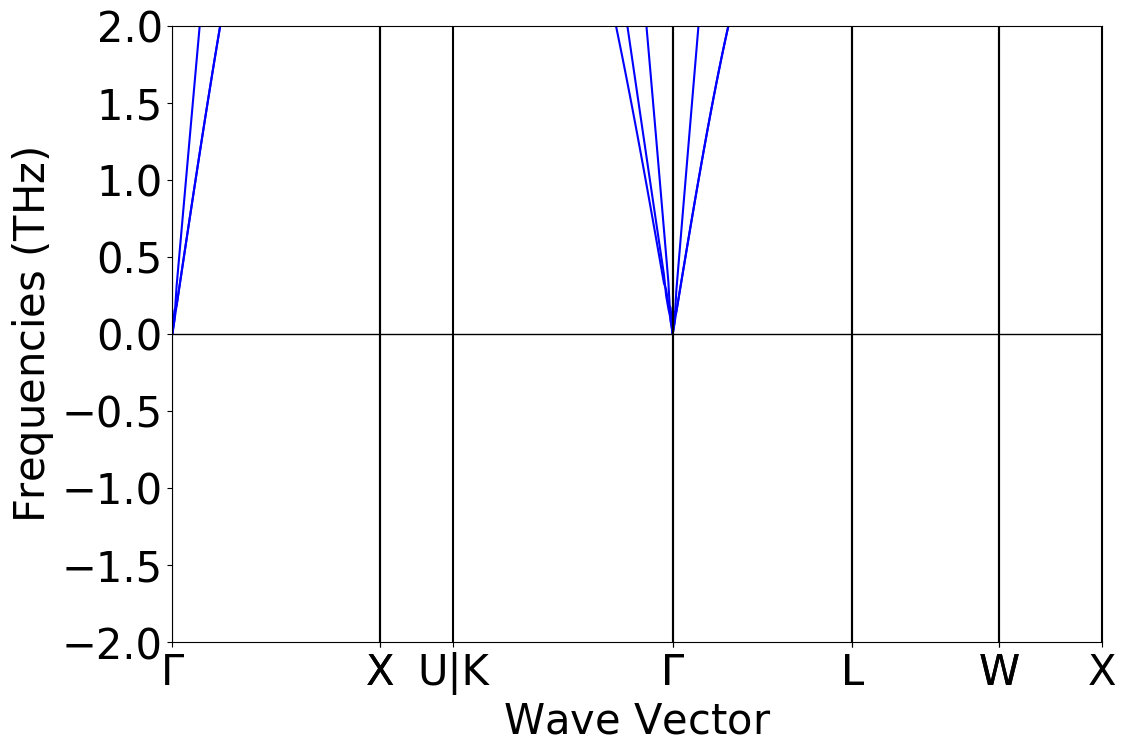

In [17]:
from pymatgen.phonon.plotter import GruneisenPhononBSPlotter
from pymatgen.phonon.gruneisen import GruneisenPhononBandStructureSymmLine
bs=GruneisenPhononBandStructureSymmLine.from_dict(result["output"]["gruneisen_band_structure"])
plt=GruneisenPhononBSPlotter(bs=bs)
plt.get_plot(ylim=[-2,2])